## Chart analysis

In this tutorial, you will learn about:

* What are the different types of charts for plotting stock data
* What are their purposes

<hr size="5"/>

Requirements:
 * [pandas](https://pypi.org/project/pandas/)
 * [matplotlib](https://matplotlib.org/)
 * [numpy](https://numpy.org/)

In [3]:
# import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import mpl_finance
from mpl_finance import volume_overlay3
from matplotlib.dates import num2date
from matplotlib.dates import date2num

### 1. Line chart

In [245]:
# load aapl csv file
df = pd.read_csv('../../database/nasdaq_ticks_day/nasdaq_AAPL.csv', header=0, index_col='Date', parse_dates=True)

# We select only the data from Jan to Dec 2019
df = df.loc[pd.Timestamp('2019-01-01'):pd.Timestamp('2019-12-31')]

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,151.824944,155.706587,151.178000,154.794983,37039700
2019-01-03,141.130823,142.836396,139.190009,139.376251,91312200
2019-01-04,141.669942,145.610396,140.954392,145.326126,58607100
2019-01-07,145.757453,145.884885,143.012857,145.002686,54777800
2019-01-08,146.600407,148.815694,145.580994,147.766861,41025300


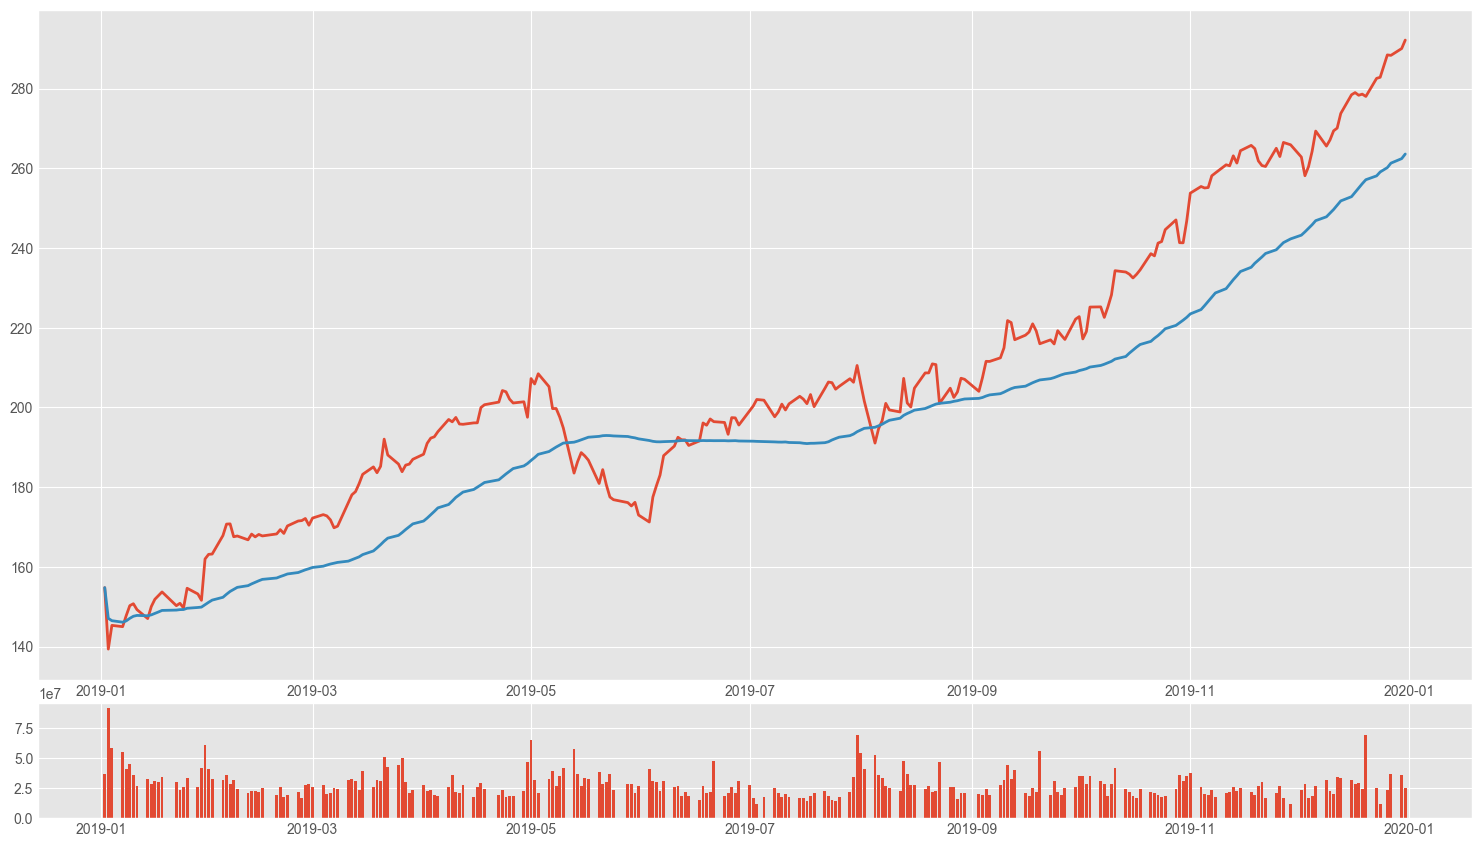

In [246]:
plt.style.use('ggplot')

# Initialise the plot figure
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

df['50ma'] = df['Close'].rolling(window=50, min_periods=0).mean()
df.dropna(inplace=True)

ax1.plot(df.index, df['Close'])
ax1.plot(df.index, df['50ma'])
ax2.bar(df.index, df['Volume'])

fig.savefig('./figures/00-line-chart.png', dpi=200)
plt.show()


### 2. Candlesticks chart

In [247]:
# load aapl csv file
df = pd.read_csv('../../database/hkex_ticks_day/hkex_0005.csv', header=0, index_col='Date', parse_dates=True)

# We select only the data from Nov to Dec 2019
df = df.loc[pd.Timestamp('2019-11-01'):pd.Timestamp('2019-12-31')]

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,58.677536,59.524324,58.677536,59.374889,10663691
2019-11-04,59.424704,59.922815,59.424704,59.873001,21465219
2019-11-05,60.072246,60.171871,59.723570,59.873001,14843111
2019-11-06,59.873003,60.271494,59.773382,60.122059,10842803
2019-11-07,59.873001,60.221681,59.773380,59.972626,14258012


In [248]:
df.index = mdates.date2num(df.index)
data = df.reset_index().values # Convert dataframe into 2-D list
print(data[:5,:])

[[7.37364000e+05 5.86775363e+01 5.95243243e+01 5.86775363e+01
  5.93748894e+01 1.06636910e+07]
 [7.37367000e+05 5.94247038e+01 5.99228153e+01 5.94247038e+01
  5.98730011e+01 2.14652190e+07]
 [7.37368000e+05 6.00722465e+01 6.01718710e+01 5.97235699e+01
  5.98730011e+01 1.48431110e+07]
 [7.37369000e+05 5.98730031e+01 6.02714938e+01 5.97733823e+01
  6.01220589e+01 1.08428030e+07]
 [7.37370000e+05 5.98730012e+01 6.02216815e+01 5.97733804e+01
  5.99726257e+01 1.42580120e+07]]


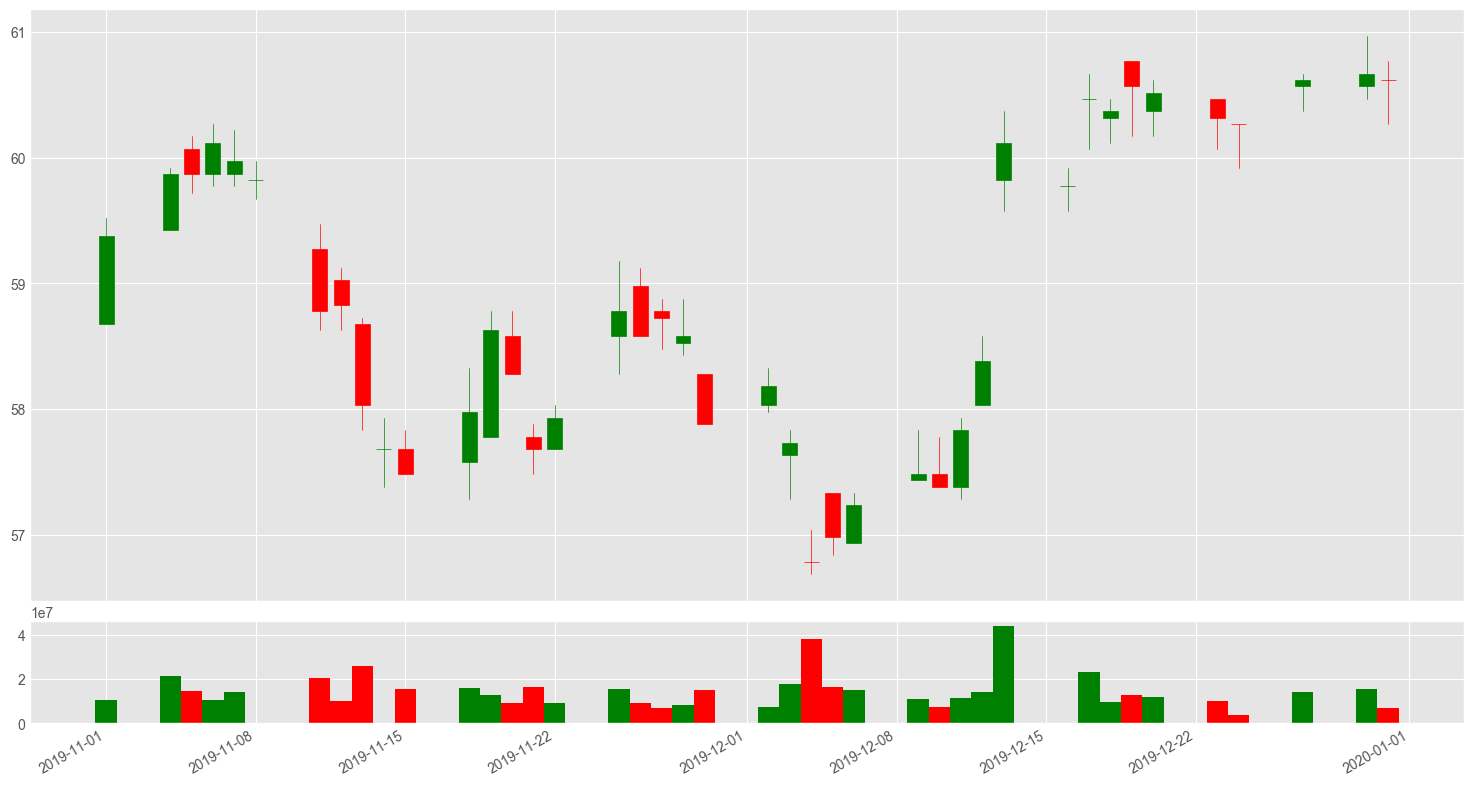

In [249]:
# import libaries
import matplotlib.dates as mdates
from mpl_finance import candlestick_ochl as candlestick
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU # for locator

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

# plot candlesticks
mpl_finance.candlestick_ohlc(ax1, data, width=0.7, colorup='g', colordown='r')

ax.grid() # show grids

############# x-axis locater settings #################

locator = mdates.AutoDateLocator() #  interval automically set
#locator = mdates.DayLocator(bymonthday=None, interval=2) # day as unit
#locator = mdates.WeekdayLocator(byweekday=(MO, TH))  # every mon and thur
#locator = mdates.WeekdayLocator(byweekday=(MO))  # every mon
#locator = mdates.MonthLocator() # monthly
#locator = mdates.YearLocator() # yearly

ax1.xaxis.set_major_locator(locator) # as as interval in a-axis
ax1.xaxis.set_minor_locator(mdates.DayLocator())

############# x-axis locater settings #################

ax1.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator)) # set x-axis label as date format

fig.autofmt_xdate() # rotate date labels on x-axis

pos = df['Open'] - df['Close'] < 0
neg = df['Open'] - df['Close'] > 0
ax2.bar(df.index[pos],df['Volume'][pos],color='green',width=1,align='center')
ax2.bar(df.index[neg],df['Volume'][neg],color='red',width=1,align='center')

#ax2.bar(df.index, df['Volume'])

plt.savefig('./figures/00-candlestick-chart.png', dpi=200)
plt.show()

#### 2.3 Bar chart

In [250]:
from matplotlib.lines import Line2D 

def westerncandlestick(ax, quotes, width=0.2, colorup='k', colordown='r', 
                 ochl=True, linewidth=0.5):

    """
    Plot the time, open, high, low, close as a vertical line ranging
    from low to high.  Use a rectangular bar to represent the
    open-close span.  If close >= open, use colorup to color the bar,
    otherwise use colordown
    
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    quotes : sequence of quote sequences
        data to plot.  time must be in float date format - see date2num
        (time, open, high, low, close, ...) vs
        (time, open, close, high, low, ...)
        set by `ochl`
    width : float
        fraction of a day for the open and close lines
    colorup : color
        the color of the lines close >= open
    colordown : color
        the color of the lines where close <  open
    ochl: bool
        argument to select between ochl and ohlc ordering of quotes
    linewidth: float
        linewidth of lines
        
    Returns
    -------
    ret : tuple
        returns (lines, openlines, closelines) where lines is a list of lines
        added
    """

    OFFSET = width / 2.0

    lines = []
    openlines = []
    closelines = []
    for q in quotes:
        if ochl:
            t, open, close, high, low = q[:5]
        else:
            t, open, high, low, close = q[:5]

        if close >= open:
            color = colorup
        else:
            color = colordown

        vline = Line2D( xdata=(t, t), ydata=(low, high),
            color=color, linewidth=linewidth, antialiased=True)
        lines.append(vline)

        openline = Line2D(xdata=(t - OFFSET, t), ydata=(open,open),
                          color=color, linewidth=linewidth, antialiased=True)
        openlines.append(openline)

        closeline = Line2D(xdata=(t , t+OFFSET), ydata=(close,close),
                          color=color, linewidth=linewidth, antialiased=True)
        closelines.append(closeline)

        ax.add_line(vline)
        ax.add_line(openline)
        ax.add_line(closeline)

    ax.autoscale_view()

    return lines, openlines, closelines

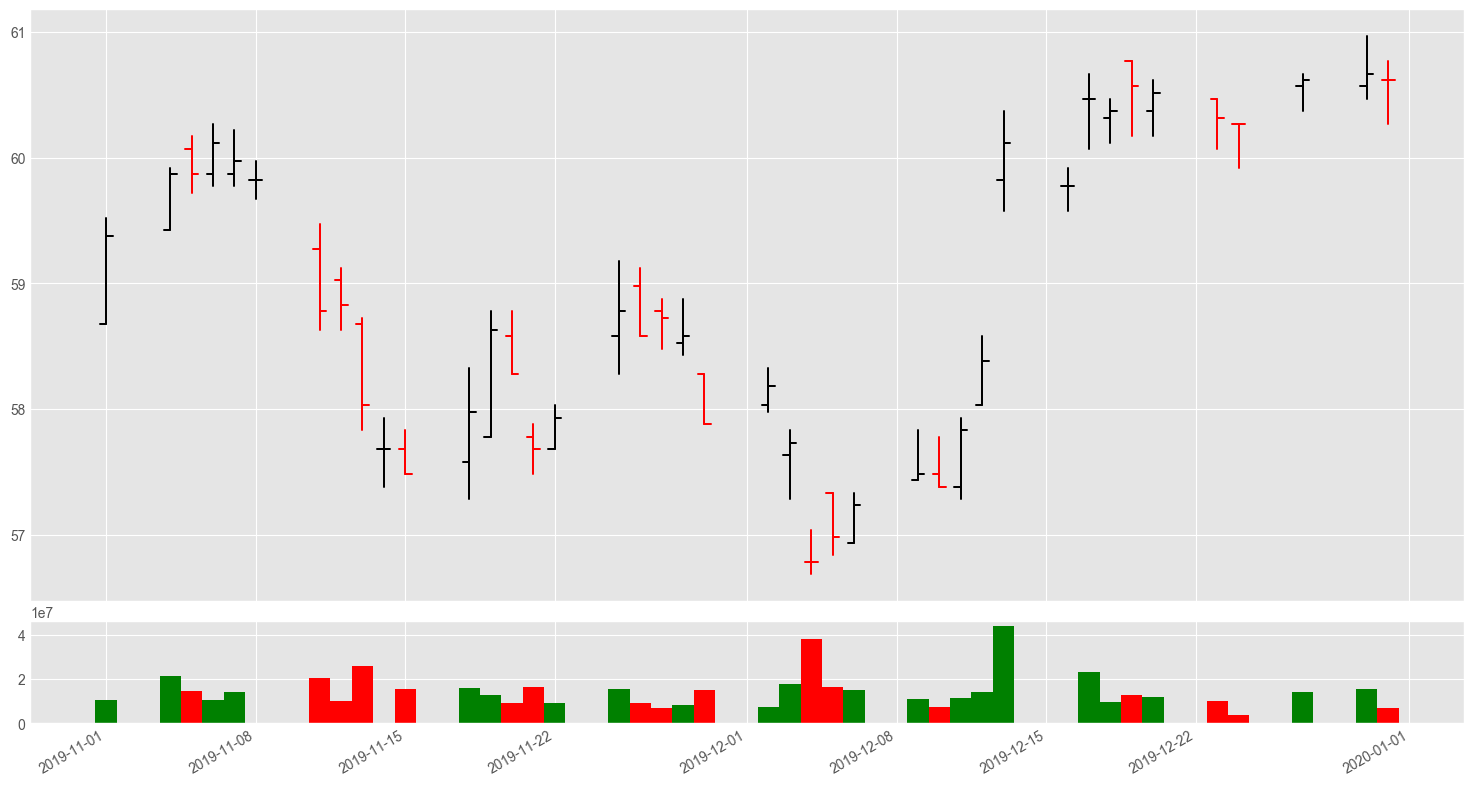

In [251]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

# plot westrencandlestick
westerncandlestick(ax1, data, width=0.6, linewidth=1.44, ochl=False)

ax.grid() # show grids

############# x-axis locater settings #################

locator = mdates.AutoDateLocator() #  interval automically set
#locator = mdates.DayLocator(bymonthday=None, interval=2) # day as unit
#locator = mdates.WeekdayLocator(byweekday=(MO, TH))  # every mon and thur
#locator = mdates.WeekdayLocator(byweekday=(MO))  # every mon
#locator = mdates.MonthLocator() # monthly
#locator = mdates.YearLocator() # yearly

ax1.xaxis.set_major_locator(locator) # as as interval in a-axis
ax1.xaxis.set_minor_locator(mdates.DayLocator())

############# x-axis locater settings #################

ax1.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator)) # set x-axis label as date format

fig.autofmt_xdate() # rotate date labels on x-axis

pos = df['Open'] - df['Close'] < 0
neg = df['Open'] - df['Close'] > 0
ax2.bar(df.index[pos], df['Volume'][pos], color='green', width=1, align='center')
ax2.bar(df.index[neg], df['Volume'][neg], color='red', width=1, align='center')

#ax2.bar(df.index, df['Volume'])

plt.savefig('./figures/00-western-candlestick-chart.png', dpi=200)
plt.show()

#### Plotting OHLC data with mplfinance

You can read the documentation [here](https://github.com/matplotlib/mplfinance).

In [252]:
! pip install --upgrade mplfinance

Requirement already up-to-date: mplfinance in /opt/anaconda3/lib/python3.7/site-packages (0.12.6a3)
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


<Figure size 640x480 with 0 Axes>

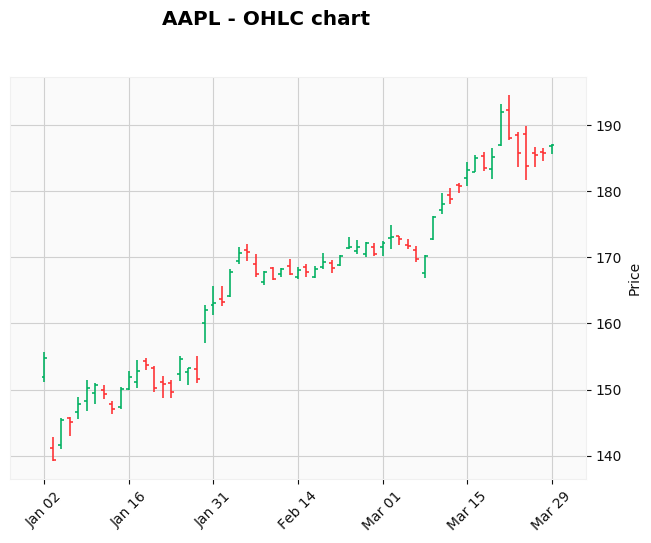

In [253]:
import mplfinance as mpf

# load aapl csv file
df = pd.read_csv('../../database/nasdaq_ticks_day/nasdaq_AAPL.csv', header=0, index_col='Date', parse_dates=True)

# We select only the data from Jan to Dec 2019
df = df.loc[pd.Timestamp('2019-01-01'):pd.Timestamp('2019-03-31')]

plt.savefig('./figures/00-mplfinance-ohlc-chart.png', dpi=200)
mpf.plot(df, style='yahoo', title="AAPL - OHLC chart")

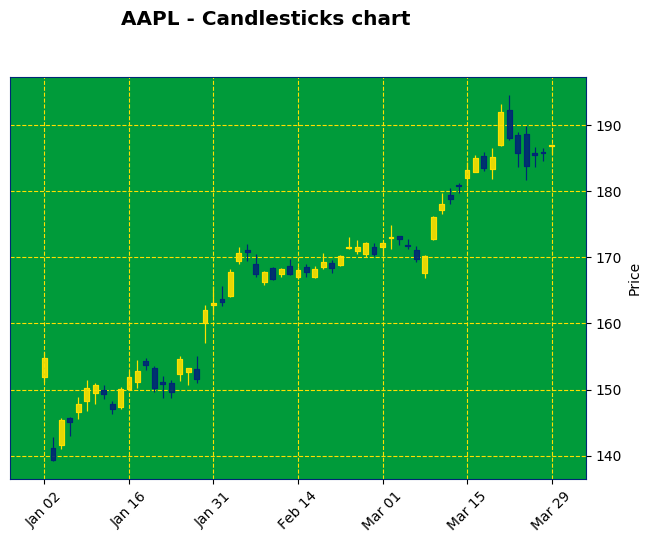

<Figure size 640x480 with 0 Axes>

In [254]:
# try a different style
mpf.plot(df, type='candle', style='brasil', title="AAPL - Candlesticks chart")
plt.savefig('./figures/00-mplfinance-candlestick-chart.png', dpi=200)

#### 2.4 Renko chart

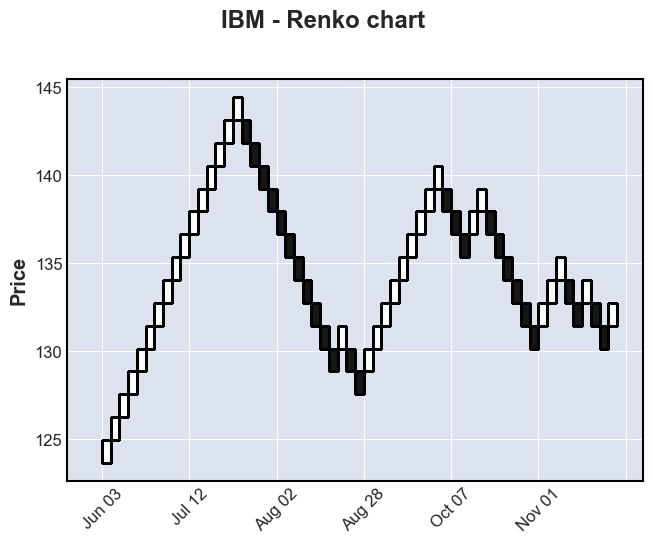

In [255]:
# load aapl csv file
df = pd.read_csv('../../database/nyse_ticks_day/nyse_IBM.csv', header=0, index_col='Date', parse_dates=True)

# We select only the data from Jan to Dec 2019
df = df.loc[pd.Timestamp('2019-06-01'):pd.Timestamp('2020-01-01')]

mpf.plot(df, type='renko', returnfig=True, title='IBM - Renko chart')

plt.savefig('./figures/00-mplfinance-renko-chart.png', dpi=200)

#### 2.5 Point and figure chart

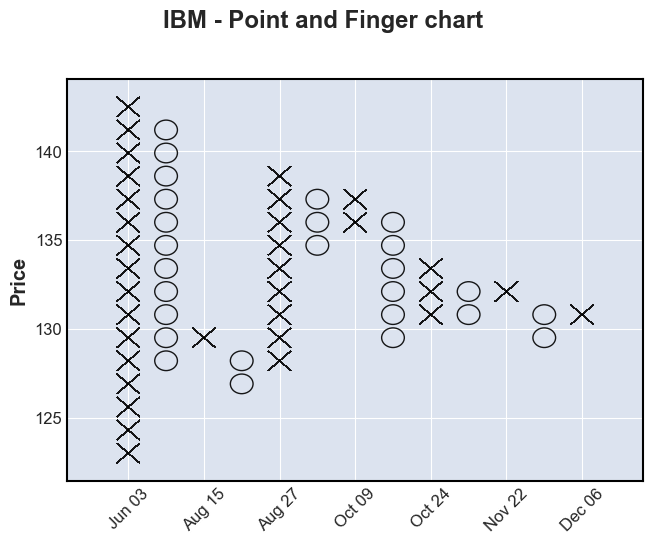

<Figure size 640x480 with 0 Axes>

In [256]:
# load aapl csv file
df = pd.read_csv('../../database/nyse_ticks_day/nyse_IBM.csv', header=0, index_col='Date', parse_dates=True)

# We select only the data from Jan to Dec 2019
df = df.loc[pd.Timestamp('2019-06-01'):pd.Timestamp('2019-12-31')]

mpf.plot(df, type='pnf', title="IBM - Point and Finger chart")
plt.savefig('./figures/00-mplfinance-pnf-chart.png', dpi=200)

#### 2.6 Arithmetic scaling & Semi-logarithmic scaling charts

There are two types of scales for plotting charts - arithmetic or semi-logarithmic. As most of us who have studied science/mathematics should know, examples of logarithmic scales include growth of microbes, mortality rate due to epidemics and so on. The difference in scale can completely alter the shape of the chart even though it is plotted using the same set of data. Semi-logarithmic charts are sometimes more preferrable in order to overcome the weaknesses inherent in arithmetic charts.

##### 2.6.1 Arithmetic scaling

In arithmetic or linear charts, both x and y axes scales are plotted at an equal distance.

<b>Key points</b>
* On a linear scale, as the distance in the axis increases the corresponding value also increases linearly.
* When the values of data fluctuate between extremely small values and very large values – the linear scale will miss out the smaller values thus conveying a wrong picture of the underlying phenomenon.

##### 2.6.2 Semi-logarithmic scaling

A semi-log plot is a graph where the data in one axis is on logarithmic scale (either x axis or y axis), and data in the other axis is on normal scale (i.e. linear scale).

<b>Key points</b>
* On a logarithmic scale, as the distance in the axis increases the corresponding value increases exponentially.
* With logarithmic scale, both smaller valued data and bigger valued data can be captured in the plot more accurately to provide a holistic view.

Therefore, semi-logarithmic charts can be of immense help especially when plotting long-term charts, or when the price points show significant volatility even in short-term charts. The underlying chart patterns will be revealed more clearly in semi-logarithmic scale charts.

/Users/angelwoo/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/angelwoo/.local/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/angelwoo/.local/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


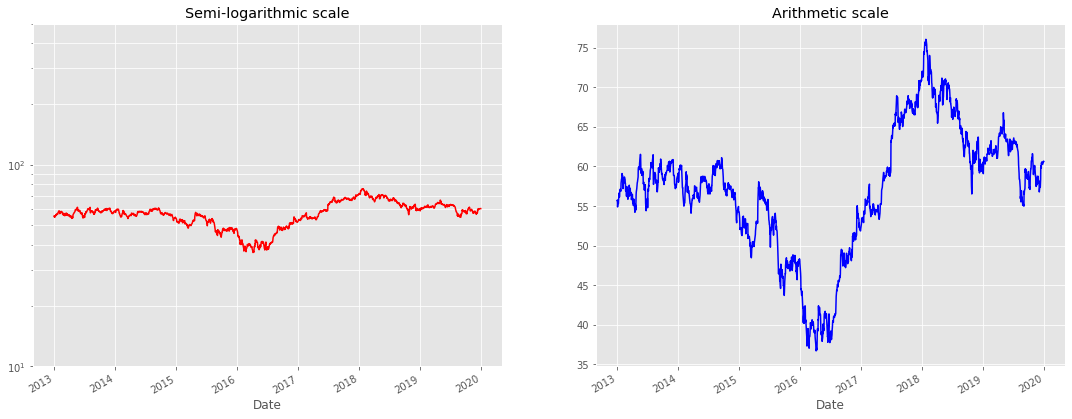

In [6]:
# load data
df = pd.read_csv('../../database/hkex_ticks_day/hkex_0005.csv', header=0, index_col='Date', parse_dates=True)
df = df.loc[pd.Timestamp('2013-01-01'):pd.Timestamp('2019-12-31')]

plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18.5, 7.0)

### Subplot 1 - Semi-logarithmic ###
plt.subplot(121)
plt.grid(True, which="both")

# Linear X axis, Logarithmic Y axis
plt.semilogy(df.index, df['Close'], 'r')
plt.ylim([10,500])

plt.xlabel("Date")
plt.title('Semi-logarithmic scale')
fig.autofmt_xdate()

### Subplot 2 - Arithmetic ###
plt.subplot(122)

plt.plot(df.index, df['Close'], 'b')

plt.xlabel("Date")
plt.title('Arithmetic scale')
fig.autofmt_xdate()

# show plot
plt.savefig('./figures/00-semilog-vs-arithmetic-chart.png', dpi=200)
plt.show()

### References
* Dorsey, Thomas J., Point & Figure Charting, Wiley, 1995.
* [Investopedia - Technical Analysis](https://www.investopedia.com/terms/t/technicalanalysis.asp)
* [Investopedia - Candlestick Charts](https://www.investopedia.com/trading/candlestick-charting-what-is-it/)
* [Drawing a semilog plot with matplotlib](https://pythontic.com/visualization/charts/semilog)